(1729, 5)


/home/wyp/miniconda3/envs/py3.10/lib/python3.10/site-packages/matplotlib/axes/_axes.py:4458: UserWarning: Warning: converting a masked element to nan.
  c = np.asanyarray(c, dtype=float)


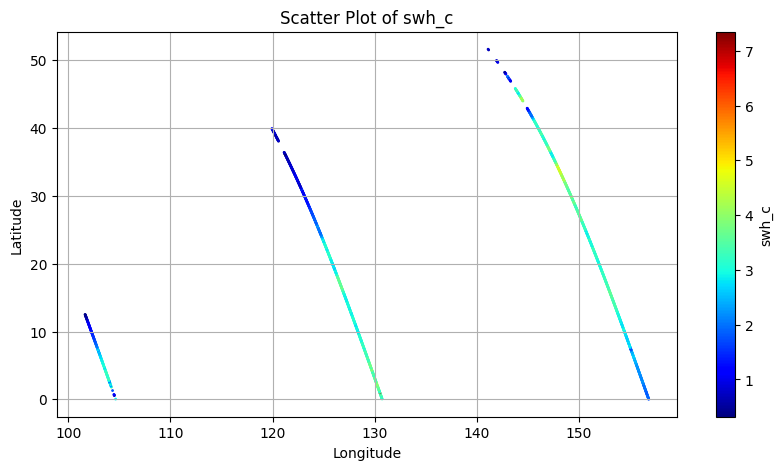

In [5]:
from netCDF4 import Dataset

import numpy as np
import matplotlib.pyplot as plt

# 加载数据
data = np.load('/media/data3/wyp/InitalField/data/satelite/filter/01/2021-01-02-06.npy',allow_pickle=True)
print(data.shape)
# 获取经度、纬度、swh_c 和 swh_ku 数据
lon = data[:, 2]
lat = data[:, 1]
swh_c = data[:, 4]
swh_ku = data[:, 3]

# 绘制 swh_c 图
plt.figure(figsize=(10, 5))
plt.scatter(lon, lat, c=swh_c, cmap='jet', s=1)
plt.colorbar(label='swh_c')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Scatter Plot of swh_c')
plt.grid(True)
plt.show()

In [ ]:
# numpy array -> 合并lat，lon


In [20]:
# 
import numpy as np
import h5py
from natsort import natsorted
import os
import matplotlib.pyplot as plt
import copy
import matplotlib as mpl
# 读取文件
satelite_path = '/media/data3/wyp/InitalField/data/satelite/filter'
swh = '/media/data3/wyp/InitalField/data/inversion_swh/output/test'
months = [ '03', '04', '05', '06', '07', '08', '09', '10', '11', '12']
for m in months:
    month_files = natsorted(os.listdir(os.path.join(satelite_path, m)))
    for file in month_files:
        satelite_hour_data = np.load(os.path.join(satelite_path, m, file), allow_pickle=True)
       # 画图   
        print(satelite_hour_data[:,1].max(), satelite_hour_data[:,1].min())

      
      
    
        
        


57.637919999999994 0.0053029999999999996
55.064842 0.034505999999999995
55.401992 0.045478
55.305550999999994 0.017464
53.864639999999994 0.006859
54.827444 0.010981999999999999
54.689744 0.012296
58.333253 0.027892999999999998
57.753840999999994 0.016987
59.546898 0.012369
57.410489 0.034837
55.821706 0.015111999999999999
55.638188 0.039103
54.266217999999995 0.007128
56.113437999999995 0.019672
53.255935 0.02269
55.312284999999996 0.007233
56.498214 0.039099999999999996
51.36306 50.499069999999996
57.86382 0.012724
57.647541 0.022732
54.658080999999996 0.05207
49.881637999999995 0.01587
59.026165999999996 0.035681
46.559422 0.012137
55.1391 0.03782
51.615528 0.027836999999999997
57.994825 0.009403
59.324191 0.043169
57.090773 0.011444
52.973870999999995 0.002435
55.207421999999994 0.049311
45.281763 0.019872
54.809279999999994 0.015352999999999999
50.630106999999995 0.014747
54.803459 0.021679999999999998
53.554108 0.029129
59.526121999999994 0.010971
56.37457 0.011013
52.249233 0.03

In [ ]:
# （time, lat, lon, swh_ku， swh_c） -> time.npy(2,lat,lon)
# dian
# 读取文件
satelite_path = '/media/data3/wyp/InitalField/data/satelite/filter'
swh = '/media/data3/wyp/InitalField/data/inversion_swh/output/test'




In [3]:
import numpy as np

# 假设您有一个包含您的数据的列表，每个元素是一个元组 (time, lat, lon, swh_ku, swh_c)
data = np.load('/media/data3/wyp/InitalField/data/satelite/filter/01/2021-01-01-18.npy',allow_pickle=True)

# 提取经纬度数据以确定数组的形状
latitudes = np.unique([lat for _, lat, _, _, _ in data])
longitudes = np.unique([lon for _, _, lon, _, _ in data])

# 初始化一个形状为 (2, len(latitudes), len(longitudes)) 的数组，初始值为 0
result_array = np.zeros((2, len(latitudes), len(longitudes)))

# 定义整点时间范围（以秒为单位），例如 00:00:00 至 01:00:00
hour_range_seconds = 3600

# 遍历整点数据
for time, lat, lon, swh_ku, swh_c in data:
    # 将 datetime 转换为 Unix 时间戳（以秒为单位）
    unix_time = int(time.timestamp())
    
    # 确定当前时间所在的整点时间
    current_hour = unix_time - (unix_time % hour_range_seconds)
    
    # 找到在当前整点时间范围内的数据
    relevant_data = [(t, lat, lon, swh_ku, swh_c) for t, lat, lon, swh_ku, swh_c in data
                     if current_hour <= int(t.timestamp()) < current_hour + hour_range_seconds]
    
    # 遍历当前整点时间范围内的数据，并将其放入数组中
    for t, lat, lon, swh_ku, swh_c in relevant_data:
        lat_index = np.where(latitudes == lat)[0][0]
        lon_index = np.where(longitudes == lon)[0][0]
        result_array[0, lat_index, lon_index] += swh_ku
        result_array[1, lat_index, lon_index] += swh_c


print(result_array.shape)
# 检查结果
print("数据已保存到 time.npy 文件中。")

/tmp/ipykernel_482412/3208668514.py:33: UserWarning: Warning: converting a masked element to nan.
  result_array[1, lat_index, lon_index] += swh_c


(2, 655, 655)
数据已保存到 time.npy 文件中。


In [3]:
import numpy as np
from scipy.interpolate import griddata
from datetime import datetime

# 假设您有一个包含您的数据的列表，每个元素是一个元组 (time, lat, lon, swh_ku, swh_c)
data = np.load('/media/data3/wyp/InitalField/data/satelite/filter/01/2021-01-01-18.npy',allow_pickle=True)

# 提取经纬度数据
lats = np.array([lat for _, lat, _, _, _ in data])
lons = np.array([lon for _, _, lon, _, _ in data])

# 提取swh_ku和swh_c数据
swh_ku = np.array([swh_ku for _, _, _, swh_ku, _ in data])
swh_c = np.array([swh_c for _, _, _, _, swh_c in data])

# 定义标准网格的经纬度范围和空间分辨率
lat_range = np.arange(0, 45.0, 0.5)
lon_range = np.arange(100, 160.0, 0.5)

# 生成标准网格的经纬度坐标
grid_lats, grid_lons = np.meshgrid(lat_range, lon_range)

# 进行插值
interp_swh_ku = griddata((lats, lons), swh_ku, (grid_lats, grid_lons), method='linear')
interp_swh_c = griddata((lats, lons), swh_c, (grid_lats, grid_lons), method='linear')

# 保存插值后的数据到文件或者继续后续处理
# 例如，如果需要将插值后的数据保存到文件：
np.save('/media/data3/wyp/InitalField/preprocess/satelite/interp_swh_ku.npy', interp_swh_ku)
np.save('/media/data3/wyp/InitalField/preprocess/satelite/interp_swh_c.npy', interp_swh_c)

# 检查结果
print("插值后的数据已保存到 interp_swh_ku.npy 和 interp_swh_c.npy 文件中。")

/tmp/ipykernel_595869/1968510604.py:14: UserWarning: Warning: converting a masked element to nan.
  swh_c = np.array([swh_c for _, _, _, _, swh_c in data])


插值后的数据已保存到 interp_swh_ku.npy 和 interp_swh_c.npy 文件中。


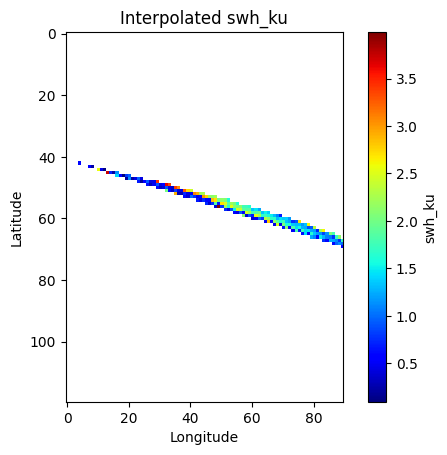

In [6]:
import numpy as np
data = np.load('/media/data3/wyp/InitalField/preprocess/satelite/interp_swh_ku.npy',allow_pickle=True)
# 画图
import matplotlib.pyplot as plt
plt.imshow(data, cmap='jet')
plt.colorbar(label='swh_ku')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Interpolated swh_ku')
plt.show()

In [ ]:
sat_path = '/media/data3/wyp/InitalField/data/satelite/grid'
era5_path = '/media/data3/wyp/InitalField/data/era5/swh/test'
folders = natsorted(os.listdir(sat_path))
mae_total = 0
rmse_total = 0
num = 0
for m in folders:
    files = natsorted(os.listdir(os.path.join(sat_path, m)))
    for file in files:
        sat_data = np.load(os.path.join(sat_path, m, file), allow_pickle=True)[1:, :, :]
        era5_data = h5py.File(os.path.join(era5_path, file.replace('npy', 'h5')), 'r')['data'][:]
        
    
        # valid_indices = np.where(~np.isnan(sat_data) & ~np.isnan(sat_data))
        sat_data[sat_data == np.nan] = 0
        
        # 硬拷贝
        mask = np.copy(sat_data)
        mask[mask != 0] = 1
        era5_data  = era5_data * mask
        
        
        mae = np.mean(np.abs(sat_data - era5_data))
        rmse = np.sqrt(np.mean((sat_data - era5_data) ** 2))
        mae_total += mae

In [8]:
#
import numpy as np
from netCDF4 import Dataset
import os
from natsort import natsorted
import matplotlib.pyplot as plt
# 读取文件
folder = '/media/data3/wyp/InitalField/data/satelite/origin/01'
files = natsorted(os.listdir(folder))
for file in files:
    data = Dataset(os.path.join(folder, file), 'r')
    print(data.variables.keys())
    print(data.variables['swh_ku'][:].shape)
    print(data.variables['swh_c'][:].shape)
    print(data.variables['lon'][:].shape)
    print(data.variables['lat'][:].shape)
    
    swh_ku = data.variables['swh_ku'][:]
    swh_c = data.variables['swh_c'][:]

    
    # 筛选出0°-60°N 100°-160°E的数据
    lat = data.variables['lat'][:]
    lon = data.variables['lon'][:]
   # 根据lat，lon 构建二维数据swh_ku
    
   
    
    print(swh_ku[swh_ku != np.nan].shape)
    print(swh_ku.shape)
    # # 画图
    # plt.figure(figsize=(10, 5))
    # plt.imshow(swh_ku, cmap='jet')
    # plt.colorbar(label='swh_ku')
    # plt.xlabel('Longitude')
    # plt.ylabel('Latitude')
    # plt.title('swh_ku')
    break



    


dict_keys(['time', 'meas_ind', 'time_day', 'time_sec', 'time_microsec', 'time_20hz', 'lat', 'lon', 'lat_20hz', 'lon_20hz', 'surface_type', 'alt_echo_type', 'rad_surf_type', 'qual_alt_1hz_range_ku', 'qual_alt_1hz_range_c', 'qual_alt_1hz_swh_ku', 'qual_alt_1hz_swh_c', 'qual_alt_1hz_sig0_ku', 'qual_alt_1hz_sig0_c', 'qual_alt_1hz_off_nadir_angle_wf_ku', 'qual_inst_corr_1hz_range_ku', 'qual_inst_corr_1hz_range_c', 'qual_inst_corr_1hz_swh_ku', 'qual_inst_corr_1hz_swh_c', 'qual_inst_corr_1hz_sig0_ku', 'qual_inst_corr_1hz_sig0_c', 'qual_rad_1hz_tb187', 'qual_rad_1hz_tb238', 'qual_rad_1hz_tb370', 'alt_state_flag_oper', 'alt_state_flag_c_band', 'alt_state_flag_ku_band_status', 'alt_state_flag_c_band_status', 'rad_state_flag_oper', 'orb_state_flag', 'ncep_meteo_map_avail', 'rain_flag', 'ice_flag', 'interp_flag_tb', 'interp_flag_mean_sea_surface', 'interp_flag_mdt', 'interp_flag_ocean_tide_sol1', 'interp_flag_ocean_tide_sol2', 'interp_flag_meteo', 'alt', 'alt_20hz', 'orb_alt_rate', 'range_ku', 'ra

(2, 120, 120)


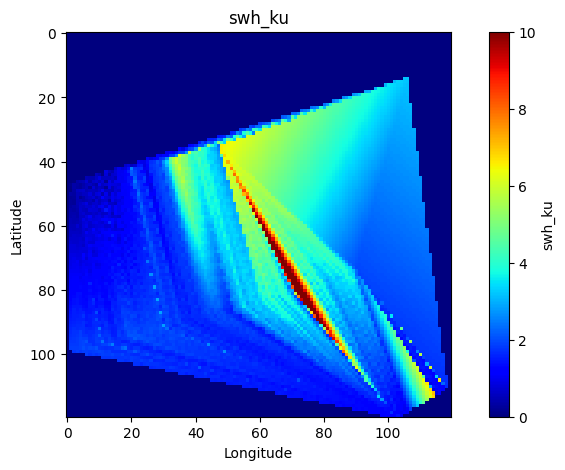

In [19]:
files = natsorted(os.listdir('/media/data3/wyp/InitalField/data/satelite/filter/01'))
for file in files[13:]:
    data = np.load(os.path.join('/media/data3/wyp/InitalField/data/satelite/grid/01', file), allow_pickle=True)
    print(data.shape)

    plt.figure(figsize=(10, 5))
    plt.imshow(data[0], cmap='jet', vmin=0, vmax=10)
    plt.colorbar(label='swh_ku')
    plt.xlabel('Longitude')
    plt.ylabel('Latitude')
    plt.title('swh_ku')
    
    
    break

In [51]:
# 
from numpy.ma import MaskedArray
folders = natsorted(os.listdir('/media/data3/wyp/InitalField/data/satelite/filter'))
folder = '01'

for file in files:
    data = np.load(os.path.join('/media/data3/wyp/InitalField/data/satelite/filter', folder, file), allow_pickle=True)
    for i in range(1, data.shape[0]):
        if data[i][3] == 'masked':
            print(data[i][3])
        
        